In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(current_dir)))
sys.path.append(parent_dir)
import streamProps
import math

class Format:
    end = '\033[0m'
    underline = '\033[4m'

In [2]:
print(Format.underline + "COLD STREAMS" + Format.end + "(from ASPEN HYSYS)")
cold1_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 71.9000, 1.19923*1e5, 4629.89033353505/3600, "R11")
cold1_In.printState()
cold1_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 110.999992, 1.15329*1e5, cold1_In.M, "R12")
cold1_Out.printState()

cold2_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 70.46758, 7.69764*1e5, 98354.9692775388/3600, "R24")
cold2_In.printState()
cold2_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 102.3896, 7.59865*1e5, cold2_In.M, "R25")
cold2_Out.printState()

print(Format.underline + "HOT STREAMS" + Format.end + "(from ASPEN HYSYS)")
mainH2_In = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 106.00, 19.526456*1e5, 10416.0000000000/3600, "F04")
mainH2_In.x_para = 0.1/(math.exp(-175/mainH2_In.T)+0.1) - 7.06*(10**-9)*(mainH2_In.T**3) \
                        + 3.42*(10**-6)*(mainH2_In.T**2) - 6.2*(10**-5)*mainH2_In.T - 0.00227
print("F04 p-H2 mole fraction: " + str(round(mainH2_In.x_para,3)))
mainH2_In.printState()
mainH2_Out = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 73.500, 19.526456*1e5, mainH2_In.M, "F05")
mainH2_Out.printState()

hot_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 112.00, 29.60653*1e5, 68999.8559394195/3600, "R03a")
hot_In.printState()
hot_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 74.00, 29.51096*1e5, hot_In.M, "R04")
hot_Out.printState()

COLD STREAMS(from ASPEN HYSYS)
Stream R11
M [kg/s]    =  1.2861
P [bar]     =  1.199
T [Kelvin]  =  71.9
H [kJ/kg]   =  998.324
S [kJ/kg.K] =  34.922


Stream R12
M [kg/s]    =  1.2861
P [bar]     =  1.153
T [Kelvin]  =  111.0
H [kJ/kg]   =  1429.679
S [kJ/kg.K] =  39.859


Stream R24
M [kg/s]    =  27.3208
P [bar]     =  7.698
T [Kelvin]  =  70.47
H [kJ/kg]   =  964.428
S [kJ/kg.K] =  26.839


Stream R25
M [kg/s]    =  27.3208
P [bar]     =  7.599
T [Kelvin]  =  102.39
H [kJ/kg]   =  1322.319
S [kJ/kg.K] =  31.076


HOT STREAMS(from ASPEN HYSYS)
F04 p-H2 mole fraction: 0.364
Stream F04
M [kg/s]    =  2.8933
P [bar]     =  19.526
T [Kelvin]  =  106.0
H [kJ/kg]   =  1799.961
S [kJ/kg.K] =  35.926


Stream F05
M [kg/s]    =  2.8933
P [bar]     =  19.526
T [Kelvin]  =  73.5
H [kJ/kg]   =  1295.166
S [kJ/kg.K] =  30.202


Stream R03a
M [kg/s]    =  19.1666
P [bar]     =  29.607
T [Kelvin]  =  112.0
H [kJ/kg]   =  1410.725
S [kJ/kg.K] =  26.282


Stream R04
M [kg/s]    =  19.1666
P [bar]   

In [3]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return abs(cold1_In.M*(cold1_In.H-cold1_Out.H) + x*(cold2_In.H-cold2_Out.H) + hot_In.M*(hot_In.H-hot_Out.H))

res = minimize_scalar(objective_function)
massFlow2A = res.x

cold2A_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, massFlow2A, "R24A")
cold2A_In.printState()
cold2B_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, cold2_In.M-massFlow2A, "R24B")
cold2B_In.printState()

Stream R24A
M [kg/s]    =  23.2392
P [bar]     =  7.698
T [Kelvin]  =  70.47
H [kJ/kg]   =  964.428
S [kJ/kg.K] =  26.839


Stream R24B
M [kg/s]    =  4.0817
P [bar]     =  7.698
T [Kelvin]  =  70.47
H [kJ/kg]   =  964.428
S [kJ/kg.K] =  26.839




In [7]:
nParallelHx = 3

lengthPFHX = 2.5425
widthPFHX = 1.5000
heightPFHX = 1.3189
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

print(Format.underline + "Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

lengthHXA     = 2.3732
widthHXA      = 1.5000
heightHXA     = 1.0901
volumeHXA     = lengthHXA*widthHXA*heightHXA

print(Format.underline + "HXA Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthHXA)
print("Width  [m]  = ", widthHXA)
print("Height [m]  = ", heightHXA)
print("Volume [m3] = ", round(volumeHXA,3))
print("\n")

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))
print("\n")

Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  2.5425
Width  [m]  =  1.5
Height [m]  =  1.3189
Volume [m3] =  5.03


HXA Geometry
(based on ASPEN EDR)
Length [m]  =  2.3732
Width  [m]  =  1.5
Height [m]  =  1.0901
Volume [m3] =  3.881


HXB Geometry
Length [m]  =  2.5425
Width  [m]  =  1.5
Height [m]  =  0.301
Volume [m3] =  1.149




Final HX-4 Geometry
Length [m]  =  5.8
Width  [m]  =  1.5
Height [m]  =  3.0
Volume [m3] =  26.1


HX-B Geometry
Length [m]  =  5.8
Width  [m]  =  1.5
Height [m]  =  2.554
Volume [m3] =  22.219

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          2.19e-01       5.55e-17          50             96       
       2          7.30e-07       0.00e+00          146             0       
Solved in 2 iterations, number of nodes 146. 
Maximum relative residual: 7.30e-07 
Maximum boundary residual: 0.00e+00


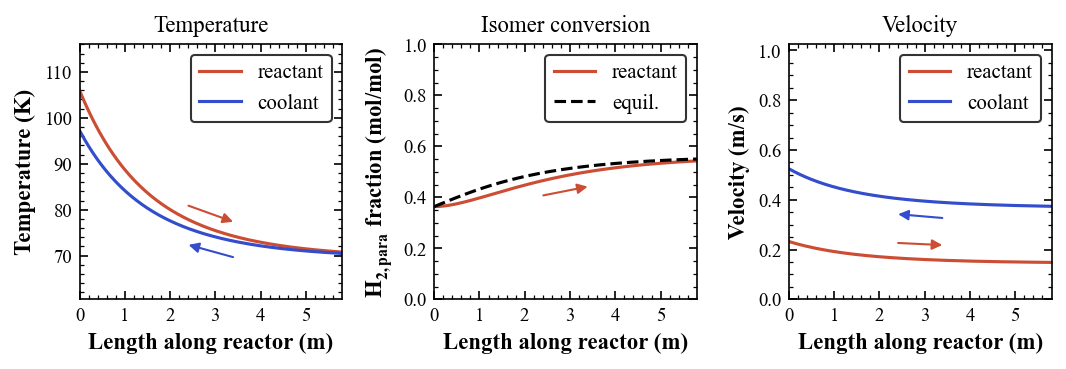

In [10]:
#Adjusted geometry
lengthPFHX = 5.800
widthPFHX  = 1.500
heightPFHX = 3.000
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4/nParallelHx, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4/nParallelHx,  # tonne-per-day
        'temperature':  cold2B_In.T,         # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000         # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,          # m
        'width': widthHXB,            # m
        'height': heightHXB,          # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Final HX-4 Geometry" + Format.end)
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

In [11]:
print(results)

        Z (m)  Reactant pressure (kPa)  Coolant pressure (kPa)  \
0    0.000000              1952.645600              769.666234   
1    0.059184              1952.608771              769.667624   
2    0.118367              1952.572521              769.668992   
3    0.157823              1952.548663              769.669892   
4    0.197279              1952.525045              769.670783   
..        ...                      ...                     ...   
141  5.642177              1950.153256              769.761674   
142  5.681633              1950.138259              769.762256   
143  5.721088              1950.123269              769.762838   
144  5.760544              1950.108288              769.763419   
145  5.800000              1950.093314              769.764000   

     Reactant temperature (K)  Coolant temperature (K)  \
0                  106.000000                97.263337   
1                  104.611081                96.200874   
2                  103.276775    